`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_mo

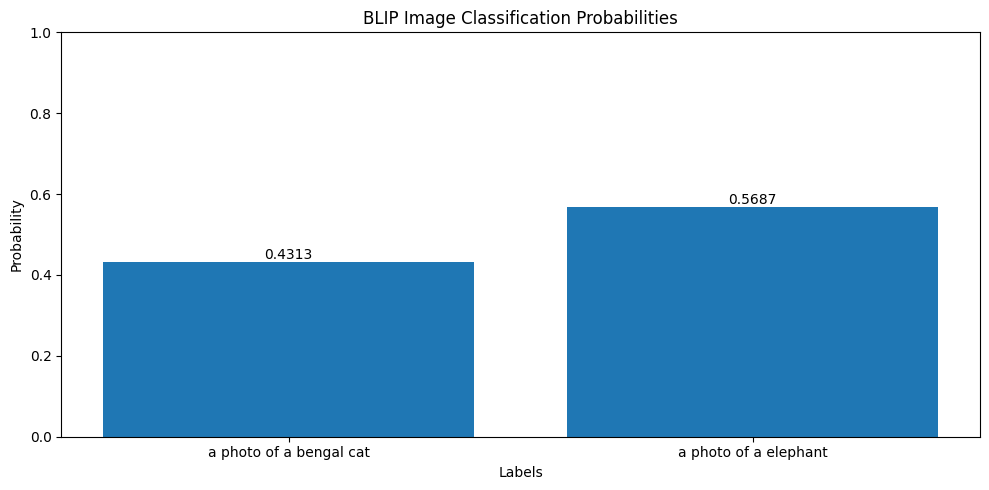

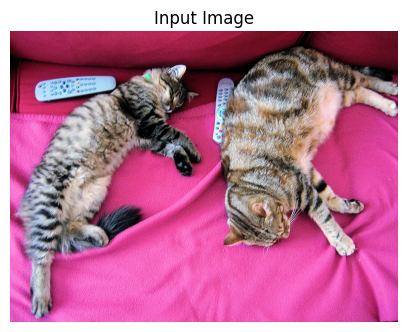

In [3]:
from PIL import Image
import requests
from transformers import AutoProcessor, BlipModel
import matplotlib.pyplot as plt
import torch

# Load model and processor
model = BlipModel.from_pretrained("Salesforce/blip-image-captioning-base")
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Define labels
labels = ["a photo of a bengal cat", "a photo of a elephant"]

# Process inputs
inputs = processor(
    text=labels,
    images=image,
    return_tensors="pt",
    padding=True
)

# Get model outputs
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = torch.softmax(logits_per_image, dim=1)  # we can take the softmax to get the label probabilities

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(labels, probs[0].detach().numpy())
plt.title("BLIP Image Classification Probabilities")
plt.xlabel("Labels")
plt.ylabel("Probability")
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

for i, prob in enumerate(probs[0]):
    plt.text(i, prob.item(), f"{prob.item():.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()